In [1]:
import numpy as np

In [2]:
def rastrigin(x):
    return 10.0 * len(x) + np.sum(x**2.0-10.0*np.cos(2.0*np.pi*x), axis=0)

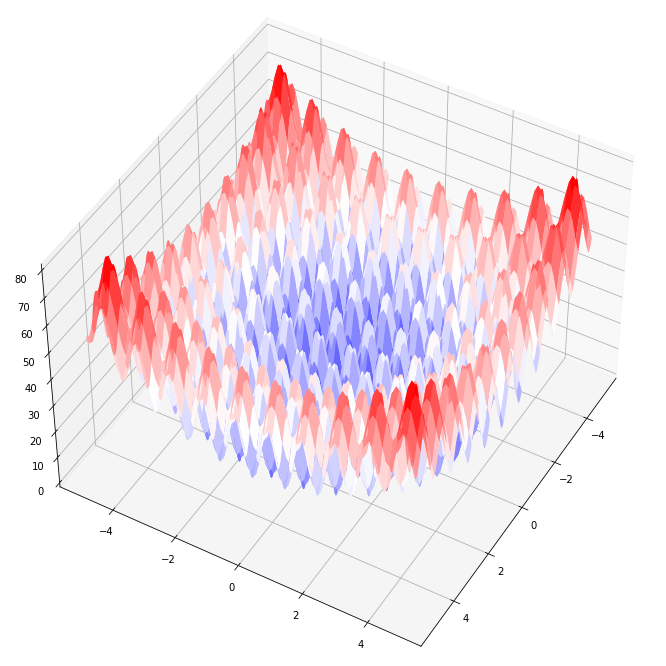

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=[15, 12])
ax = fig.gca(projection='3d')
ax.view_init(45, 30)

X = np.arange(-5.12, 5.12, 0.01)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = rastrigin(np.array([X,Y]))

surf = ax.plot_surface(X, Y, Z, cmap='bwr')
plt.show()

In [4]:
from scipy.optimize import differential_evolution

In [16]:
result = differential_evolution(rastrigin, bounds, seed=21)
result['nit']

144

# Strategy

In [19]:
bounds = [(-10, 10), (-10, 10), (-10,10), (-10,10)]
dict_strat = {}
strategys = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']
for strat in strategys:
    result = differential_evolution(rastrigin, bounds, seed=21, strategy=strat)
    nit = result['nit']
    dict_strat[strat] = nit
dict_strat

{'best1bin': 144,
 'best1exp': 222,
 'rand1exp': 433,
 'randtobest1exp': 239,
 'currenttobest1exp': 332,
 'best2exp': 484,
 'rand2exp': 652,
 'randtobest1bin': 180,
 'currenttobest1bin': 249,
 'best2bin': 395,
 'rand2bin': 618,
 'rand1bin': 379}

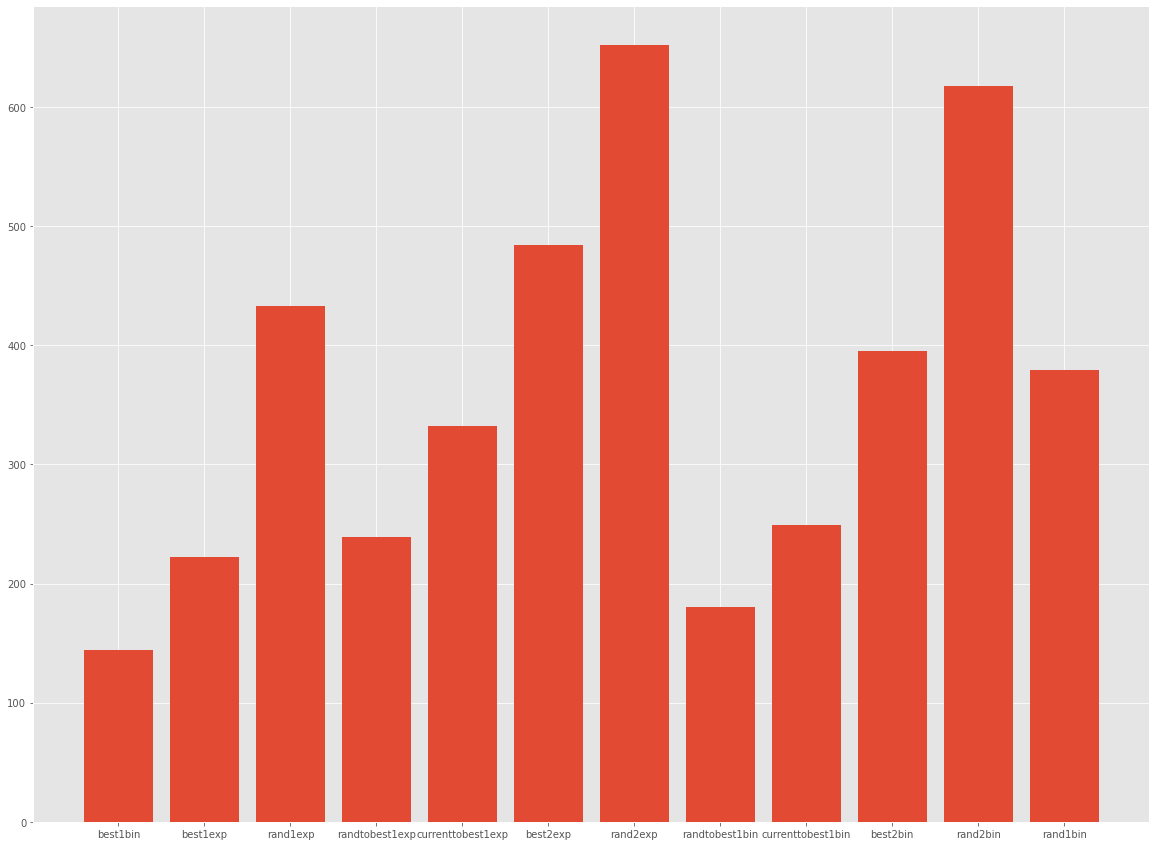

In [45]:
plt.figure(figsize=[20, 15])
plt.bar(x=dict_strat.keys(), height=dict_strat.values())
plt.show()

In [40]:
result = differential_evolution(rastrigin, bounds, seed=21, popsize=100)
print(result)

     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 53605
     nit: 133
 success: True
       x: array([-3.33469252e-09,  3.96296329e-10, -1.12816978e-09, -7.84778909e-10])


# Popsize

In [70]:
list_nit = []
for pop in range(50):
    result = differential_evolution(rastrigin, bounds, seed=21, popsize=pop)
    nit = result['nit']
    list_nit.append(nit)
print(list_nit)

[36, 36, 49, 37, 133, 39, 68, 75, 82, 80, 121, 59, 133, 163, 79, 144, 135, 139, 69, 161, 138, 63, 149, 143, 131, 139, 137, 137, 149, 148, 127, 142, 148, 141, 137, 146, 123, 142, 156, 145, 151, 158, 140, 152, 136, 143, 133, 144, 137, 146]


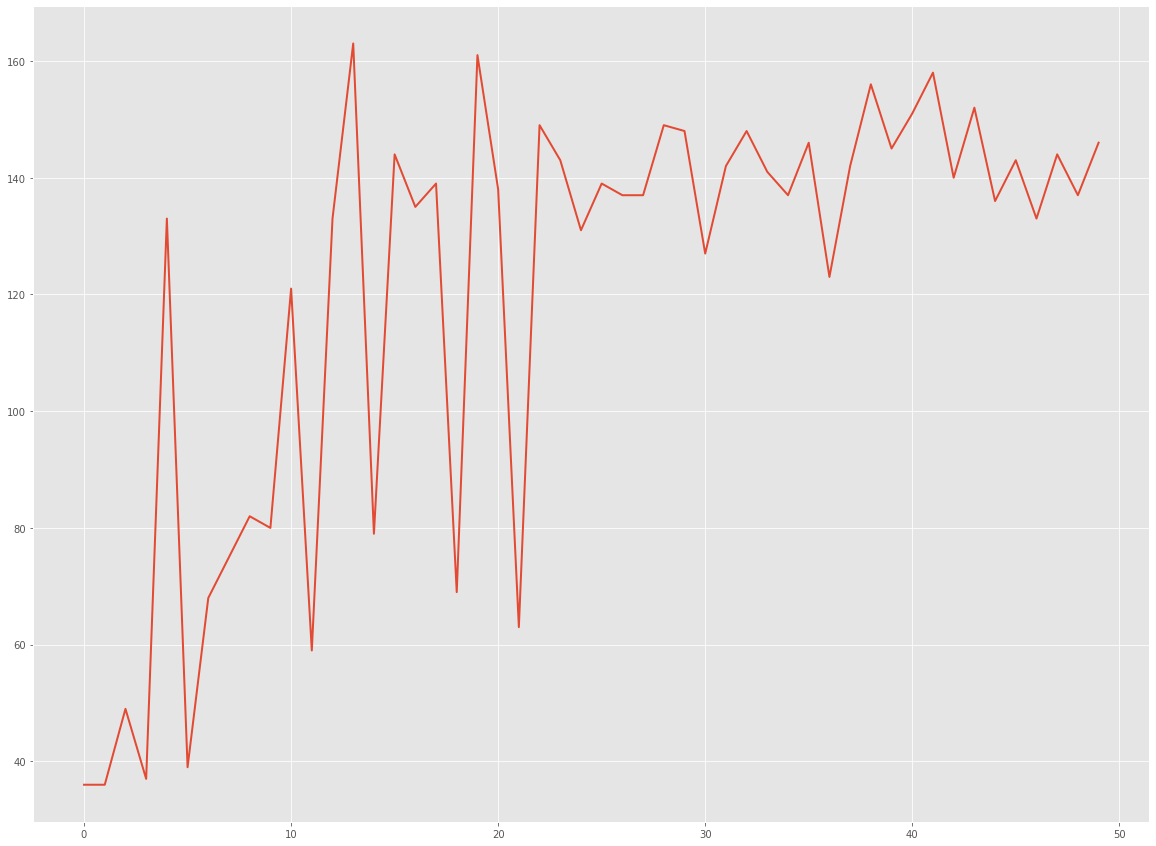

In [69]:
plt.figure(figsize=[20, 15])
x = np.arange(0, 50)
y = list_nit
plt.plot(x, y, linewidth=2.0)
plt.show()

# Tol

In [79]:
list_nit = []
for t in np.arange(0.1, 1, 0.1):
    result = differential_evolution(rastrigin, bounds, seed=21, tol=t)
    nit = result['nit']
    list_nit.append(nit)
print(list_nit)

[144, 144, 144, 1, 1, 1, 1, 1, 1]


In [94]:
result = differential_evolution(rastrigin, bounds, seed=21, updating='deferred')
result

     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 10325
     nit: 171
 success: True
       x: array([ 2.44960940e-09,  3.48401308e-10, -2.52026178e-10,  3.79872134e-09])

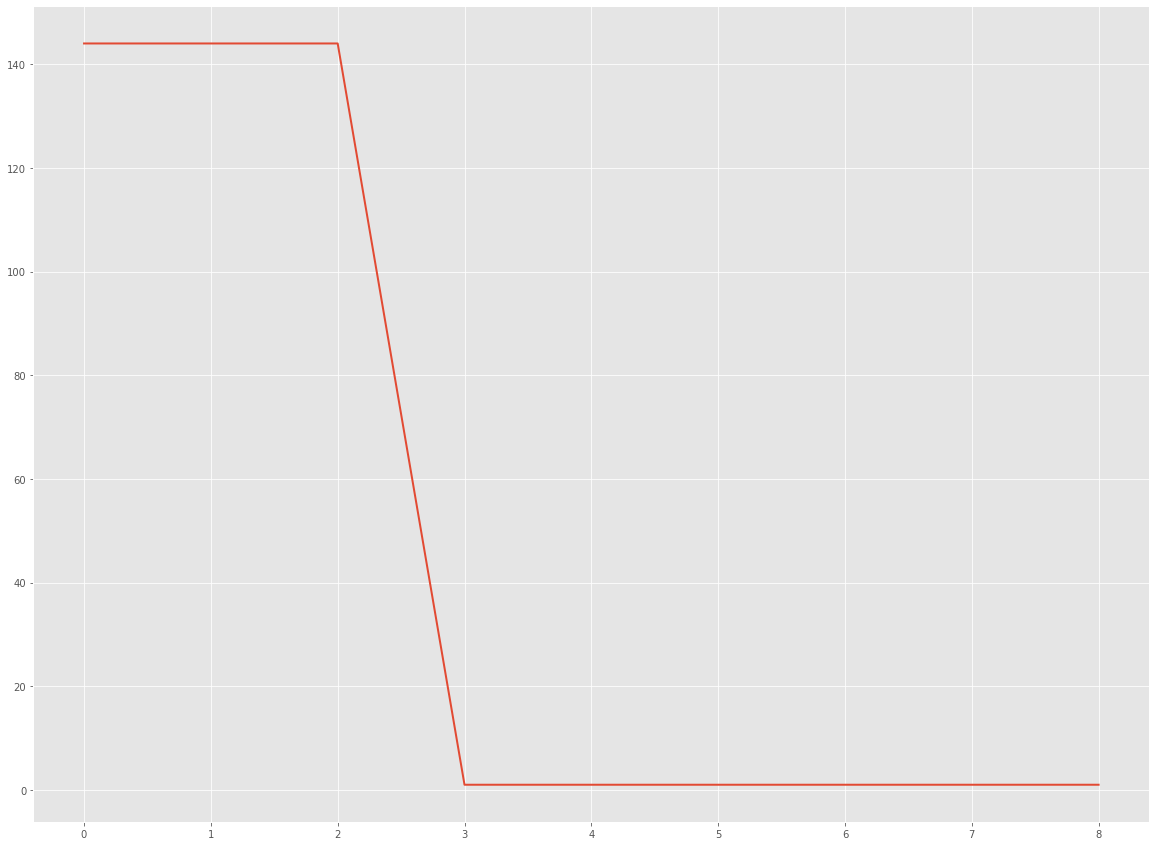

In [81]:
plt.figure(figsize=[20, 15])
x = np.arange(0, 9)
y = list_nit
plt.plot(x, y, linewidth=2.0)
plt.show()

# Mutation

In [82]:
list_nit = []
for m in np.arange(0.1, 2, 0.1):
    result = differential_evolution(rastrigin, bounds, seed=21, mutation=m)
    nit = result['nit']
    list_nit.append(nit)
print(list_nit)

[7, 13, 14, 49, 73, 95, 56, 77, 221, 235, 331, 184, 536, 247, 243, 395, 338, 411, 474]


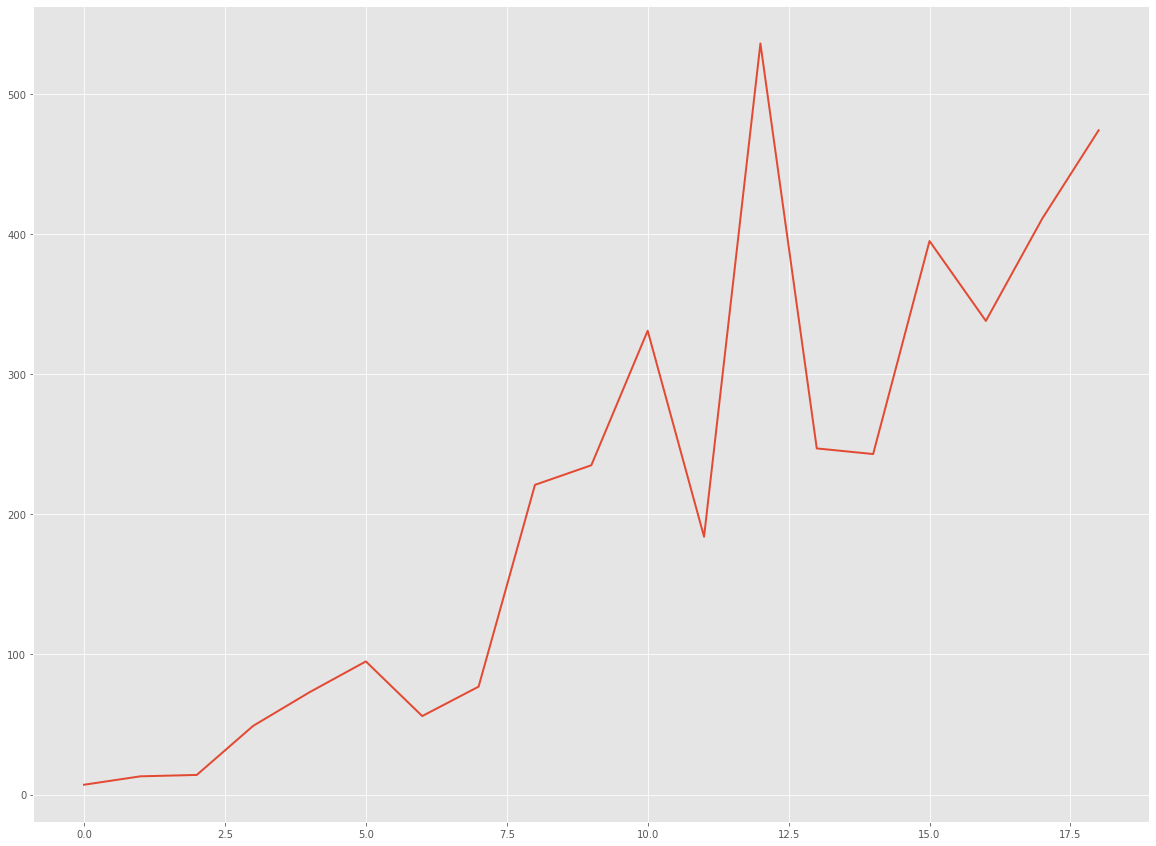

In [87]:
plt.figure(figsize=[20, 15])
x = np.arange(0, 19)
y = list_nit
plt.plot(x, y, linewidth=2.0)
plt.show()

# 

In [88]:
list_nit = []
for c in np.arange(0.1, 1, 0.1):
    result = differential_evolution(rastrigin, bounds, seed=21, recombination=c)
    nit = result['nit']
    list_nit.append(nit)
print(list_nit)

[163, 171, 150, 140, 145, 144, 144, 68, 59]


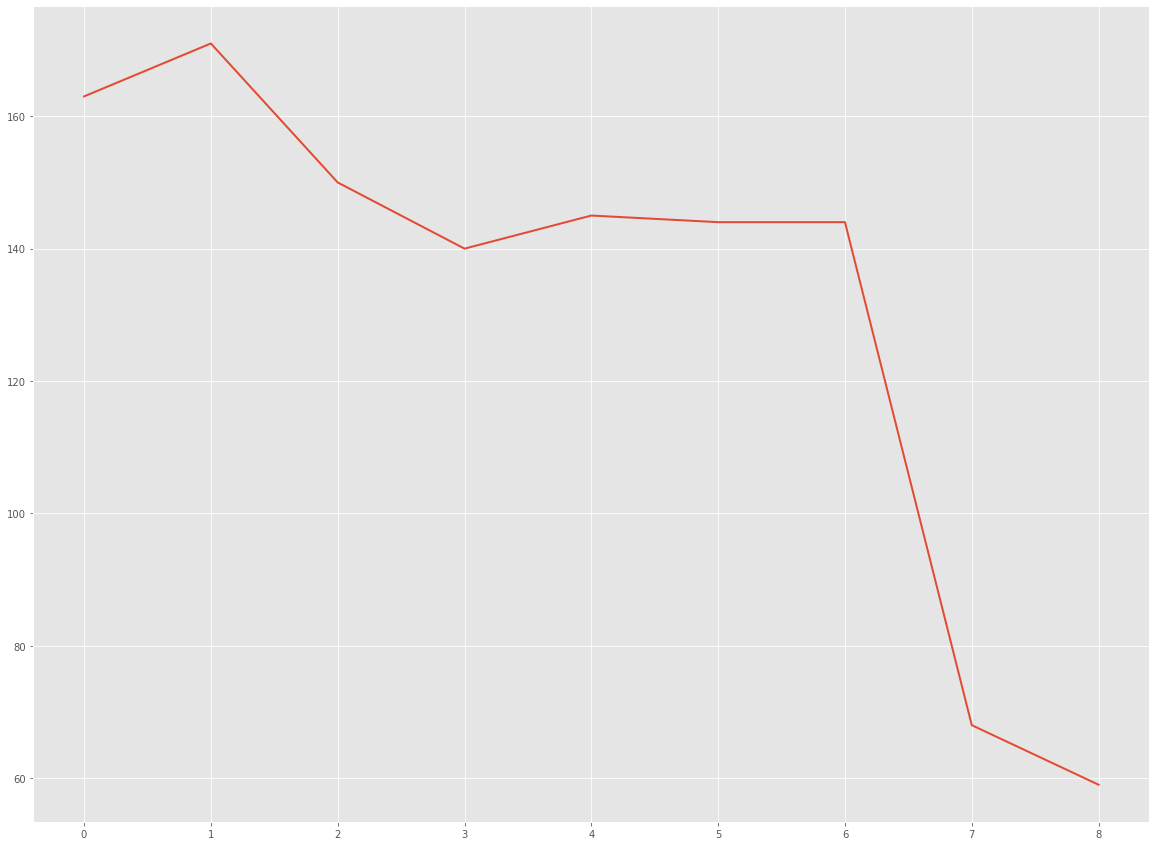

In [89]:
plt.figure(figsize=[20, 15])
x = np.arange(0, 9)
y = list_nit
plt.plot(x, y, linewidth=2.0)
plt.show()

In [95]:
dict_upt = {}
upd = ['immediate', 'deferred']
for u in upd:
    result = differential_evolution(rastrigin, bounds, seed=21, updating=u)
    nit = result['nit']
    dict_upt[u] = nit
dict_upt

{'immediate': 144, 'deferred': 171}

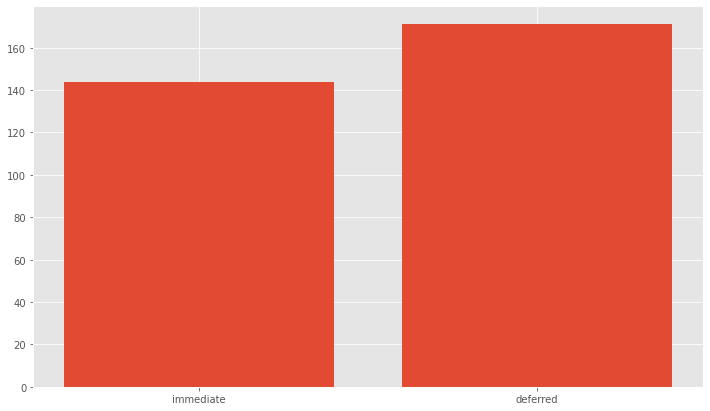

In [97]:
plt.figure(figsize=[12, 7])
plt.bar(x=dict_upt.keys(), height=dict_upt.values())
plt.show()